In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tf_agents.environments.tf_py_environment import TFPyEnvironment
from tf_agents.environments.gym_wrapper import GymWrapper
from tf_agents.environments.batched_py_environment import BatchedPyEnvironment

from pathlib import Path
import json
import yaml

2023-02-28 23:29:24.875605: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-28 23:29:24.983777: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-28 23:29:25.688795: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-28 23:29:25.688904: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

In [2]:
import procgen

In [3]:
from IPython.display import clear_output

In [4]:
import gym
env = gym.make('procgen-coinrun-v0')

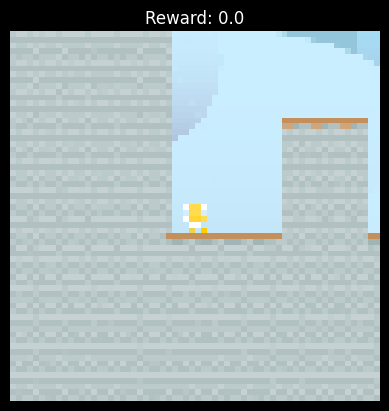

In [9]:
obs = env.reset()

def render(obs, reward=None, clear=True):
    plt.imshow(obs)
    if reward is not None:
        plt.title(f"Reward: {reward}")
    plt.axis('off')
    plt.show()
    if clear:
        clear_output(wait=True)

reward = 0
try:
    while True:
        obs, reward, done, info = env.step(env.action_space.sample())
        render(obs, reward)
        if done:
            break

except KeyboardInterrupt:
    render(obs, reward)

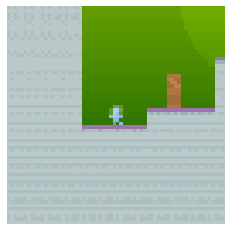

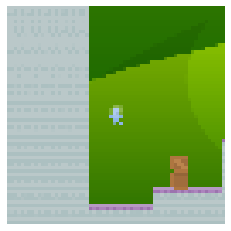

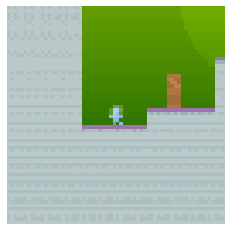

In [101]:
obs = env.reset()

for _ in range(10):
    obs, *_ = env.step(env.action_space.sample())

render(obs, clear=False)
state = env.env.env.get_state()

for _ in range(100):
    obs, *_ = env.step(env.action_space.sample())

render(obs, clear=False)
env.env.env.set_state(state)

render(env.env.observe()[1][0])


In [5]:
import tensorflow as tf
from tf_agents.agents import TFAgent
from tf_agents.policies import TFPolicy
from tf_agents.policies.random_tf_policy import RandomTFPolicy
from tf_agents.policies.random_py_policy import RandomPyPolicy
from tf_agents.environments.tf_py_environment import TFPyEnvironment
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.utils import common

In [6]:
gym_env = GymWrapper(env)
gym_env._action_is_discrete = False  # gym wrapper takes action from numpy array unless this is set

tf_env = TFPyEnvironment(gym_env)
tf_env.reset()

random_policy = RandomTFPolicy(
    tf_env.time_step_spec(),
    tf_env.action_spec()
)

2023-02-28 23:29:33.577565: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-28 23:29:33.663677: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:
2023-02-28 23:29:33.663704: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-02-28 23:29:33.664348: I tensorflow/core/platform/cpu

In [7]:
tf_env.time_step_spec()

TimeStep(
{'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32)),
 'observation': BoundedTensorSpec(shape=(64, 64, 3), dtype=tf.uint8, name='observation', minimum=array(0, dtype=uint8), maximum=array(255, dtype=uint8)),
 'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
 'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type')})

In [8]:
random_policy.action(tf_env.current_time_step())

PolicyStep(action=<tf.Tensor: shape=(1,), dtype=int64, numpy=array([13])>, state=(), info=())

In [9]:
from mlrl.utils import render_utils

In [10]:
def render_fn(tf_env, *_):
    cenv = tf_env._env.envs[0].env.env
    return cenv.observe()[1][0]

In [28]:
render_utils.embed_mp4(render_utils.save_policy_eval_video(
    random_policy, tf_env, render_fn, 'video', max_steps=15*30), width=256, height=256)